In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df_train = pd.read_csv("/content/drive/MyDrive/MIT Critical Datathon Team 1/data/train and test data/train.csv")
df_test =pd.read_csv("/content/drive/MyDrive/MIT Critical Datathon Team 1/data/train and test data/test.csv") 
df_train.head()

,norepinephrine_equivalent_dose,invasive_vent,albumin,mchc,los_hospital,pt,rrt,ph,delta_ld_ldh,mortality_in,bun,SpO2,SOFA_admission,mcv,los_icu,delta_vent_start,delta_sofa_liver,FiO2,aniongap,glucose_lab,sofa_resp,anchor_age,CCI,chloride,ld_ldh,hidden_hypoxemia,language,SaO2,gender,lactate,delta_SpO2,rdw,BMI,HFNC,InvasiveVent,NonInvasiveVent,None_ventilation,SupplementalOxygen,Tracheostomy,Asian,Black,Hispanic,Other_race_group,White,Medicaid,Medicare,Other,los_icu_dead,los_icu_surv
0,0.000000,1.0,0.610169,0.875312,0.022727,0.075333,0.0,0.960682,0.791722,0.0,0.069264,0.971429,0.190476,0.757812,0.011222,0.998385,0.000000,0.5,0.24,0.044505,0.4,0.479452,0.368421,0.801471,0.003871,0.0,1.0,0.971429,1.0,0.108333,1.0,0.366947,0.399722,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.014170
1,0.004503,1.0,0.355932,0.775561,0.077273,0.070000,0.0,0.967235,0.507584,0.0,0.134199,1.000000,0.476190,0.757812,0.066460,0.996245,0.353138,0.4,0.20,0.074024,0.6,0.849315,0.315789,0.816176,0.007491,0.0,1.0,0.914286,1.0,0.083333,1.0,0.400560,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.076889
2,0.000000,1.0,0.355932,0.785536,0.077273,0.078667,0.0,0.977720,0.507434,0.0,0.108225,1.000000,0.476190,0.765625,0.066460,0.976105,0.350970,0.4,0.22,0.061308,0.6,0.849315,0.315789,0.808824,0.007491,0.0,1.0,0.942857,1.0,0.066667,0.7,0.408964,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.076889
3,0.002858,1.0,0.711864,0.857855,0.018182,0.091333,0.0,0.959371,0.506559,0.0,0.077922,0.971429,0.333333,0.734375,0.008803,0.998766,0.000000,0.8,0.16,0.044959,0.8,0.520548,0.157895,0.852941,0.005829,0.0,1.0,0.914286,0.0,0.070833,0.0,0.380952,0.272888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.011424
4,0.003314,1.0,0.711864,0.840399,0.018182,0.091333,0.0,0.961992,0.506501,0.0,0.077922,1.000000,0.333333,0.734375,0.008803,0.990967,0.000000,0.5,0.16,0.044959,0.4,0.520548,0.157895,0.845588,0.005829,0.0,1.0,0.971429,0.0,0.075000,0.6,0.397759,0.272888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.011424


In [ ]:
!pip install shap
!pip install yellowbrick
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd
pd.set_option("display.max_columns", 160)
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Creation
from sklearn.model_selection import train_test_split, GroupShuffleSplit, GridSearchCV

# Dataset Processing
from sklearn import datasets, linear_model, metrics
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Model Development
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import Ridge 
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ClassificationReport, ClassPredictionError
from yellowbrick.regressor import ResidualsPlot, PredictionError

# Feature Importance
import shap

In [ ]:
df_train.columns

Index(['norepinephrine_equivalent_dose', 'invasive_vent', 'albumin', 'mchc',
       'los_hospital', 'pt', 'rrt', 'ph', 'delta_ld_ldh', 'mortality_in',
       'bun', 'SpO2', 'SOFA_admission', 'mcv', 'los_icu', 'delta_vent_start',
       'delta_sofa_liver', 'FiO2', 'aniongap', 'glucose_lab', 'sofa_resp',
       'anchor_age', 'CCI', 'chloride', 'ld_ldh', 'hidden_hypoxemia',
       'language', 'SaO2', 'gender', 'lactate', 'delta_SpO2', 'rdw', 'BMI',
       'HFNC', 'InvasiveVent', 'NonInvasiveVent', 'None_ventilation',
       'SupplementalOxygen', 'Tracheostomy', 'Asian', 'Black', 'Hispanic',
       'Other_race_group', 'White', 'Medicaid', 'Medicare', 'Other',
       'los_icu_dead', 'los_icu_surv'],
      dtype='object')

In [ ]:
label_cols=['hidden_hypoxemia', 'SaO2']

y_train = df_train[label_cols]
X_train = df_train.drop(columns=label_cols)

y_test = df_test[label_cols]
X_test = df_test.drop(columns=label_cols)

y_train_c = y_train[['hidden_hypoxemia']].values
y_test_c = y_test[['hidden_hypoxemia']].values
y_train_r = y_train[['SaO2']].values
y_test_r = y_test[['SaO2']].values

# SVM baseline

In [ ]:
feats = df_train.columns
for feat in feats:
  print(feat)
  print(df_train[feat].value_counts())
binary_variables=['invasive_vent', 'language', 'gender', 'rrt', 'mortality_in', 'HFNC', 'InvasiveVent', 'NonInvasiveVent', 'None_ventilation', 'SupplementalOxygen',  'Tracheostomy', 'Asian', 'Black', 'Hispanic', 'Other_race_group', 'White', 'Medicaid', 'Medicare', 'Other']
X_train_continuous = X_train.drop(columns=binary_variables)
X_test_continuous = X_test.drop(columns=binary_variables)
X_train_binary = X_train[binary_variables]
X_test_binary = X_test[binary_variables]

preprocessor = make_pipeline(StandardScaler())

train_preprocessed = preprocessor.fit_transform(X_train_continuous)
pd.DataFrame(train_preprocessed, columns=preprocessor.get_feature_names_out())
test_preprocessed = preprocessor.transform(X_test_continuous)

X_train_processed=pd.concat([X_train_binary, pd.DataFrame(train_preprocessed, columns=preprocessor.get_feature_names_out())], axis=1, join='inner')
X_test_processed=pd.concat([X_test_binary, pd.DataFrame(test_preprocessed, columns=preprocessor.get_feature_names_out())], axis=1, join='inner')

# Defining parameter range
param_grid = {'C': [0.1, 100], 
              'gamma': [1, 0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_processed.values, y_train_c.ravel())

cpredictions = grid.predict(X_test_processed.values)

print('Score: {}'.format(grid.score(X_test_processed.values, y_test_c.ravel())))

norepinephrine_equivalent_dose
0.000000    6789
0.001501     415
0.000901     366
0.000600     326
0.001201     205
            ... 
0.000895       1
0.091874       1
0.007400       1
0.189812       1
0.093042       1
Name: norepinephrine_equivalent_dose, Length: 2833, dtype: int64
invasive_vent
1.0    10587
0.0     3271
Name: invasive_vent, dtype: int64
albumin
0.457627    714
0.474576    669
0.525424    622
0.491525    597
0.508475    574
0.440678    565
0.593220    564
0.542373    563
0.576271    547
0.423729    522
0.406780    509
0.559322    507
0.677966    472
0.000000    471
0.644068    469
0.610169    459
0.661017    455
0.627119    420
0.694915    419
0.389831    415
0.372881    392
0.711864    375
0.355932    353
0.728814    334
0.338983    294
0.745763    265
0.762712    264
0.779661    215
0.322034    157
0.796610    138
0.288136    109
0.305085     96
0.813559     72
0.271186     65
0.847458     36
0.830508     33
0.254237     33
0.237288     33
0.220339     23
0.864407   

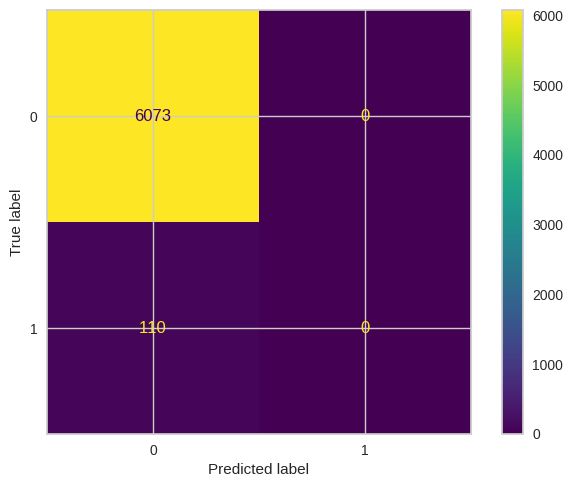

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test_c, cpredictions))
cm_display.plot()
plt.show()

# XG boost regulated

In [ ]:
feats = df_train.columns
for feat in feats:
  print(feat)
  print(df_train[feat].value_counts())
binary_variables=['invasive_vent', 'language', 'gender', 'rrt', 'mortality_in', 'HFNC', 'InvasiveVent', 'NonInvasiveVent', 'None_ventilation', 'SupplementalOxygen',  'Tracheostomy', 'Asian', 'Black', 'Hispanic', 'Other_race_group', 'White', 'Medicaid', 'Medicare', 'Other']
X_train_continuous = X_train.drop(columns=binary_variables)
X_test_continuous = X_test.drop(columns=binary_variables)
X_train_binary = X_train[binary_variables]
X_test_binary = X_test[binary_variables]

preprocessor = make_pipeline(StandardScaler())

train_preprocessed = preprocessor.fit_transform(X_train_continuous)
pd.DataFrame(train_preprocessed, columns=preprocessor.get_feature_names_out())
test_preprocessed = preprocessor.transform(X_test_continuous)

X_train_processed=pd.concat([X_train_binary, pd.DataFrame(train_preprocessed, columns=preprocessor.get_feature_names_out())], axis=1, join='inner')
X_test_processed=pd.concat([X_test_binary, pd.DataFrame(test_preprocessed, columns=preprocessor.get_feature_names_out())], axis=1, join='inner')


norepinephrine_equivalent_dose
0.000000    6789
0.001501     415
0.000901     366
0.000600     326
0.001201     205
            ... 
0.000895       1
0.091874       1
0.007400       1
0.189812       1
0.093042       1
Name: norepinephrine_equivalent_dose, Length: 2833, dtype: int64
invasive_vent
1.0    10587
0.0     3271
Name: invasive_vent, dtype: int64
albumin
0.457627    714
0.474576    669
0.525424    622
0.491525    597
0.508475    574
0.440678    565
0.593220    564
0.542373    563
0.576271    547
0.423729    522
0.406780    509
0.559322    507
0.677966    472
0.000000    471
0.644068    469
0.610169    459
0.661017    455
0.627119    420
0.694915    419
0.389831    415
0.372881    392
0.711864    375
0.355932    353
0.728814    334
0.338983    294
0.745763    265
0.762712    264
0.779661    215
0.322034    157
0.796610    138
0.288136    109
0.305085     96
0.813559     72
0.271186     65
0.847458     36
0.830508     33
0.254237     33
0.237288     33
0.220339     23
0.864407   

In [ ]:
X_train_processed.shape, X_test_processed.shape, y_train_c.shape

((13858, 47), (6183, 47), (13858, 1))

In [ ]:
X_train_processed.columns

Index(['invasive_vent', 'language', 'gender', 'rrt', 'mortality_in', 'HFNC',
       'InvasiveVent', 'NonInvasiveVent', 'None_ventilation',
       'SupplementalOxygen', 'Tracheostomy', 'Asian', 'Black', 'Hispanic',
       'Other_race_group', 'White', 'Medicaid', 'Medicare', 'Other',
       'norepinephrine_equivalent_dose', 'albumin', 'mchc', 'los_hospital',
       'pt', 'ph', 'delta_ld_ldh', 'bun', 'SpO2', 'SOFA_admission', 'mcv',
       'los_icu', 'delta_vent_start', 'delta_sofa_liver', 'FiO2', 'aniongap',
       'glucose_lab', 'sofa_resp', 'anchor_age', 'CCI', 'chloride', 'ld_ldh',
       'lactate', 'delta_SpO2', 'rdw', 'BMI', 'los_icu_dead', 'los_icu_surv',
       'target'],
      dtype='object')

In [ ]:
import numpy as np
import xgboost as xgb
from typing import Tuple

def gradient(predt: np.ndarray, dtrain: xgb.DMatrix) -> np.ndarray:
    '''Compute the gradient squared log error.'''
    y = dtrain.get_label()
    return (np.log1p(predt) - np.log1p(y)) / (predt + 1)

def hessian(predt: np.ndarray, dtrain: xgb.DMatrix) -> np.ndarray:
    '''Compute the hessian for squared log error.'''
    y = dtrain.get_label()
    return ((-np.log1p(predt) + np.log1p(y) + 1) /
            np.power(predt + 1, 2))

def squared_log(predt: np.ndarray,
                dtrain: xgb.DMatrix) -> Tuple[np.ndarray, np.ndarray]:
    '''Squared Log Error objective. A simplified version for RMSLE used as
    objective function.
    '''
    predt[predt < -1] = -1 + 1e-6
    grad = gradient(predt, dtrain)
    hess = hessian(predt, dtrain)
    return grad, hess

def rmsle(predt: np.ndarray, dtrain: xgb.DMatrix) -> Tuple[str, float]:
    ''' Root mean squared log error metric.'''
    y = dtrain.get_label()
    predt[predt < -1] = -1 + 1e-6
    elements = np.power(np.log1p(y) - np.log1p(predt), 2)
    return 'PyRMSLE', float(np.sqrt(np.sum(elements) / len(y)))

X_train_processed["target"] = y_train_c
X_test_processed["target"] = y_test_c
dtrain = xgb.DMatrix(X_train_processed.drop(columns=["target"]), label=X_train_processed["target"])
dtest = xgb.DMatrix(X_test_processed.drop(columns=["target"]), label=X_test_processed["target"])

xgb.train({'tree_method': 'hist', 'seed': 1994,
           'disable_default_eval_metric': 1},
          dtrain=dtrain,
          num_boost_round=10,
          obj=squared_log,
          feval=rmsle,
          evals=[(dtrain, 'dtrain'), (dtest, 'dtest')],
          evals_result={})

[0]	dtrain-PyRMSLE:0.19283	dtest-PyRMSLE:0.19599
[1]	dtrain-PyRMSLE:0.13330	dtest-PyRMSLE:0.14033
[2]	dtrain-PyRMSLE:0.10340	dtest-PyRMSLE:0.11378
[3]	dtrain-PyRMSLE:0.08752	dtest-PyRMSLE:0.10075
[4]	dtrain-PyRMSLE:0.07858	dtest-PyRMSLE:0.09467


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.


[5]	dtrain-PyRMSLE:0.07396	dtest-PyRMSLE:0.09162
[6]	dtrain-PyRMSLE:0.07071	dtest-PyRMSLE:0.09020
[7]	dtrain-PyRMSLE:0.06867	dtest-PyRMSLE:0.08981
[8]	dtrain-PyRMSLE:0.06719	dtest-PyRMSLE:0.08948
[9]	dtrain-PyRMSLE:0.06636	dtest-PyRMSLE:0.08935


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb

# Example training data with "race" and "gender" columns

class CustomObjective:
    def __call__(self, y_true, y_pred):
        # Extract race and gender columns from y_true and y_pred
        race_true, gender_true = y_true[:, 0], y_true[:, 1]
        race_pred, gender_pred = y_pred[:, 0], y_pred[:, 1]

        # Compute the loss for each race and gender separately
        race_loss = np.abs(race_true - race_pred).mean()
        gender_loss = np.abs(gender_true - gender_pred).mean()

        # Combine the losses with equal weights (you can adjust the weights as needed)
        loss = 0.5 * race_loss + 0.5 * gender_loss

        return loss

class CustomMetric:
    def __call__(self, y_pred, y_true):
        # Extract race and gender columns from y_true and y_pred
        race_true, gender_true = y_true[:, 0], y_true[:, 1]
        race_pred, gender_pred = y_pred[:, 0], y_pred[:, 1]

        # Compute the accuracy for each race and gender separately
        race_accuracy = (race_true == np.round(race_pred)).mean()
        gender_accuracy = (gender_true == np.round(gender_pred)).mean()

        # Combine the accuracies with equal weights (you can adjust the weights as needed)
        metric = 0.5 * race_accuracy + 0.5 * gender_accuracy

        return "custom_metric", metric


# Example usage
X_train = X_train_processed[["gender", 'Asian']].values
y_train_race = X_train_processed["gender"].values
y_train_gender = X_train_processed["Asian"].values

dtrain = xgb.DMatrix(X_train, label=np.column_stack((y_train_race, y_train_gender)))

params = {
    'obj': CustomObjective(),
    'eval_metric': CustomMetric(),
}


((13858, 6), (13858,))